In [1]:
import pandas as pd
import numpy as np
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from hdbscan import HDBSCAN
from umap import UMAP
import plotly.io as pio
pio.renderers.default = "svg"

/home/jovyan/conda-envs/pythonenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
embedding_model="all-mpnet-base-v2"

In [3]:
train_df = pd.read_excel('/home/jovyan/DL/data_train_2_after_gpt.xlsx')

In [4]:
def process_dataset(df):
    columns_to_read = ['prompt_summary']
    df = df.dropna(subset=['prompt_summary'], inplace=False)
    df = df.prompt_summary.apply(lambda x: x.replace("the software developer intends", ""))
    docs = df.to_list()
    return docs


In [41]:
def train_model(docs):
    hdbscan_model = HDBSCAN(min_cluster_size=3, metric='euclidean',
                        cluster_selection_method='eom', prediction_data=True, min_samples=3)
    vectorizer_model = TfidfVectorizer(stop_words="english", min_df=2, ngram_range=(2,3), max_df = 50)
    umap_model = UMAP(n_neighbors=3, n_components=3,
                    min_dist=0.1)
    representation_model = MaximalMarginalRelevance(diversity=1)
    model = BERTopic(vectorizer_model=vectorizer_model, representation_model=representation_model, hdbscan_model= hdbscan_model, umap_model=umap_model, embedding_model=embedding_model).fit(docs)
    return model

In [42]:
docs_train = process_dataset(train_df)

In [43]:
model = train_model(docs_train)

In [44]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,22,-1_documentation software_programming language...,"[documentation software, programming language,...",[The software developer intends to understand ...
1,0,15,0_input formats_intends determine_string softw...,"[input formats, intends determine, string soft...",[The software developer is seeking to understa...
2,1,15,1_process steps_developer seeking assistance_e...,"[process steps, developer seeking assistance, ...",[The software developer is seeking assistance ...
3,2,14,2_test data used_follow specific_understand co...,"[test data used, follow specific, understand c...",[The software developer intends to find the mo...
4,3,10,3_executing provided_command prompt cmd_proble...,"[executing provided, command prompt cmd, probl...",[The software developer intends to verify the ...
5,4,10,4_developer intends configure_intends ensure_b...,"[developer intends configure, intends ensure, ...",[The software developer's intention is to prov...
6,5,10,5_seeking alternative_request creation_individ...,"[seeking alternative, request creation, indivi...",[The software developer intends to modify the ...
7,6,10,6_code encountering_likely improve_string mani...,"[code encountering, likely improve, string man...",[The software developer intends to understand ...
8,7,9,7_json file_automated testing_javascript softw...,"[json file, automated testing, javascript soft...",[The software developer intends to learn the p...
9,8,9,8_developer intends define_eliminate redundanc...,"[developer intends define, eliminate redundanc...",[The software developer is seeking guidance on...


In [45]:
model.get_topic_freq()

,Topic,Count
8,-1,22
4,0,15
18,1,15
7,2,14
11,3,10
16,4,10
6,5,10
1,6,10
0,7,9
24,8,9


In [46]:
model.get_document_info(docs_train)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,The software developer intends to clarify the ...,7,7_json file_automated testing_javascript softw...,"[json file, automated testing, javascript soft...",[The software developer intends to learn the p...,json file - automated testing - javascript sof...,1.000000,True
1,The software developer intends to prevent unin...,6,6_code encountering_likely improve_string mani...,"[code encountering, likely improve, string man...",[The software developer intends to understand ...,code encountering - likely improve - string ma...,0.550021,False
2,The software developer intends to ascertain wh...,24,24_specific guidelines_function calculating_ja...,"[specific guidelines, function calculating, ja...",[The software developer is seeking validation ...,specific guidelines - function calculating - j...,1.000000,True
3,The software developer is seeking to understan...,9,9_intends receive_data structures_javascript s...,"[intends receive, data structures, javascript ...",[The software developer intends to provide an ...,intends receive - data structures - javascript...,1.000000,True
4,The software developer is seeking assistance i...,0,0_input formats_intends determine_string softw...,"[input formats, intends determine, string soft...",[The software developer is seeking to understa...,input formats - intends determine - string sof...,1.000000,False
...,...,...,...,...,...,...,...,...
217,The software developer intends to verify the c...,3,3_executing provided_command prompt cmd_proble...,"[executing provided, command prompt cmd, probl...",[The software developer intends to verify the ...,executing provided - command prompt cmd - prob...,1.000000,True
218,The software developer intends to create a Pyt...,9,9_intends receive_data structures_javascript s...,"[intends receive, data structures, javascript ...",[The software developer intends to provide an ...,intends receive - data structures - javascript...,0.694507,False
219,The software developer intends to create and d...,16,16_functions software developer_github reposit...,"[functions software developer, github reposito...",[The software developer intends to refine thei...,functions software developer - github reposito...,0.503827,True
220,The software developer intends to understand w...,2,2_test data used_follow specific_understand co...,"[test data used, follow specific, understand c...",[The software developer intends to find the mo...,test data used - follow specific - understand ...,0.388530,False


In [47]:
document_info = model.get_document_info(docs_train)

In [48]:
topic_info = model.get_topic_info()

In [49]:
model.get_topic(topic=0)

[('input formats', 0.08056631431973149),
 ('intends determine', 0.052189483796721836),
 ('string software developer', 0.0502003529116485),
 ('likely improve', 0.044608831088010795),
 ('request creation', 0.04423472531186985),
 ('using javascript', 0.04344996731925621),
 ('current user', 0.04330727134031785),
 ('seeking understand', 0.04045640392730906),
 ('seeking guidance instructions', 0.03764281782605842),
 ('likely purpose', 0.03561762806401596)]

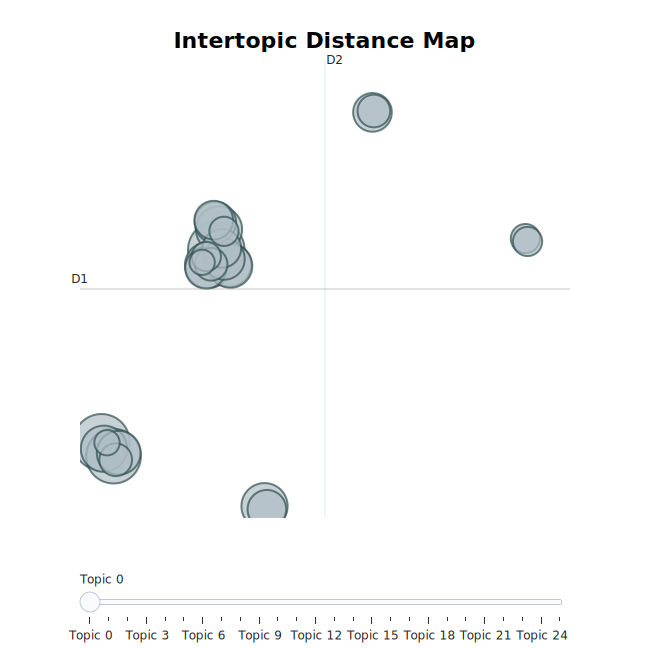

In [50]:
model.visualize_topics()

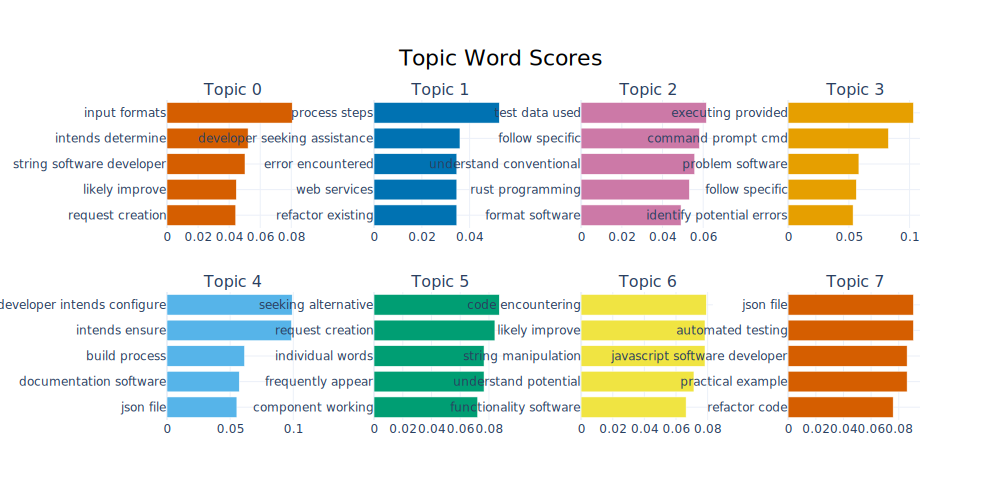

In [51]:
model.visualize_barchart()

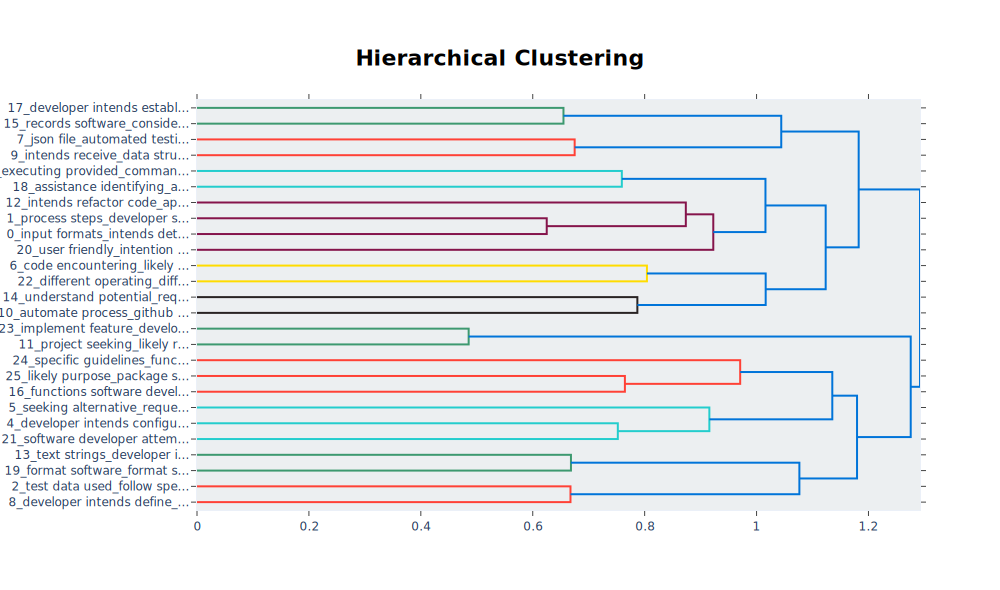

In [52]:
model.visualize_hierarchy()

In [55]:
df = model.get_topic_info().Name

In [56]:
df.to_excel('/home/jovyan/DL/cluster_names.xlsx', index=True) 

In [57]:
test_df = pd.read_excel('/home/jovyan/DL/data_test_2_after_gpt.xlsx')

In [58]:
docs_test = process_dataset(test_df)

In [61]:
topics_test, probs = model.transform(docs_test)